In [1]:

import os
import subprocess
from PIL import Image

#dir0 = 'heic' 
dir0 ='org'
dir1 = 'png'
dir2 = 'png_resize'

files0 = os.listdir(dir0)
files0.sort()

for file in files0:

    if '.HEIC'  in file:        
        command = 'sips --setProperty format png ' + dir0 +'/' + file +  ' --out ' + dir1 +'/' +  file.replace('.HEIC','.png') 
        subprocess.call(command, shell=True)
        print(file) 
        
files1 = os.listdir(dir1)
files1.sort()
print('')

for file in files1:
    
    if '.png' in file:   
        img0 = os.path.join(dir1, file)
        img0_img = Image.open(img0)
        img1_img = img0_img.resize((300,300)) 
        img1 = os.path.join(dir2, file) 
        img1_img.save(img1)
        print(file)
    
#pngをリサイズするプログラム終了

1DE9DAE4-9EC8-4173-B9ED-74E870F28419-586-0000004CD5C6D9A4.HEIC
2145411D-B4DA-4A0F-9B3F-61E51DE7B9BC-586-0000004CD526A1EF.HEIC
96B10EAB-6F36-4290-B010-D8F627791DE2-586-0000004CD63E0AE5.HEIC

1DE9DAE4-9EC8-4173-B9ED-74E870F28419-586-0000004CD5C6D9A4.png
2145411D-B4DA-4A0F-9B3F-61E51DE7B9BC-586-0000004CD526A1EF.png
96B10EAB-6F36-4290-B010-D8F627791DE2-586-0000004CD63E0AE5.png


1DE9DAE4-9EC8-4173-B9ED-74E870F28419-586-0000004CD5C6D9A4.png : 15
2145411D-B4DA-4A0F-9B3F-61E51DE7B9BC-586-0000004CD526A1EF.png : 50
96B10EAB-6F36-4290-B010-D8F627791DE2-586-0000004CD63E0AE5.png : 0


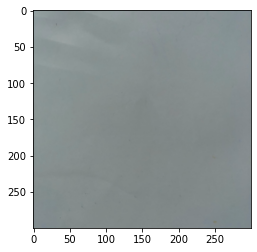

In [2]:

import cv2
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

image_data2 = []
dir2 = 'png_resize'
files2 = os.listdir(dir2)
files2.sort()

for file in files2:
    if '.png'  in file:        
        img = cv2.imread('./png_resize/' + file)
        plt.imshow(img)
        h, w, c = img.shape    

        v_split = 100
        h_split = 100 
        _img = img[:h // v_split * v_split, :w // h_split * h_split]

        image_data =[]

        for h_img in np.vsplit(_img, v_split): 
            for v_img in np.hsplit(h_img, h_split): 
                b, g, r = cv2.split(v_img)  
                value = round(b.mean())/100
                if value > 1.0:   #criteria
                    value2 = 0
                else:
                    value2 = 1
                image_data.append(value2)

        score = round(sum(image_data)*10)
        image_data2.append(score)   
        
        print(file+' : '+str(round(sum(image_data)/10)))  

        # the score smaller, more clean
        